In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones visuales
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Cargar datos
users = pd.read_csv("../data/processed/users.csv")
movies = pd.read_csv("../data/processed/movies.csv")
ratings = pd.read_csv("../data/processed/ratings.csv")


In [2]:
# Vistas generales
users.head()
movies.head()
ratings.head()


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
print(users.info())
print(movies.info())
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     10

In [6]:
ratings["Datetime"] = pd.to_datetime(ratings["Timestamp"], unit="s")


In [7]:
ratings.head()

,UserID,MovieID,Rating,Timestamp,Datetime
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11


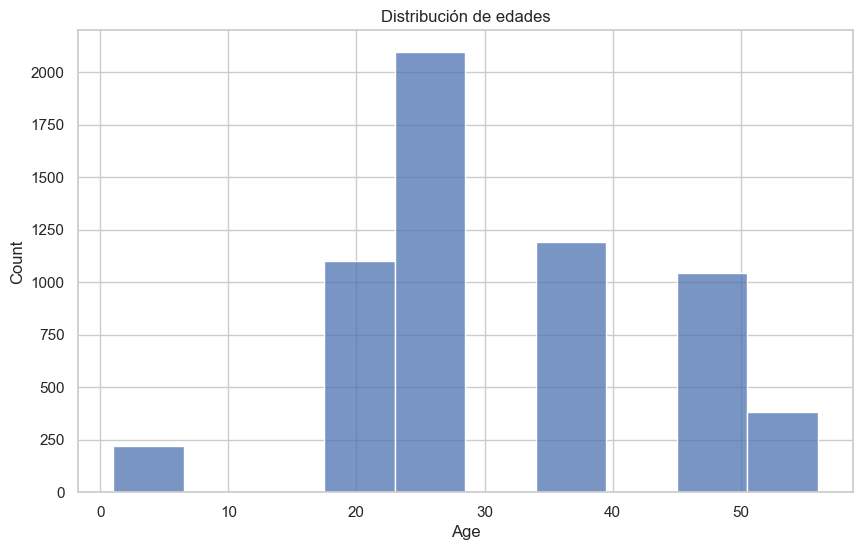

In [8]:
# Distribución de edades
sns.histplot(users["Age"], bins=10)
plt.title("Distribución de edades")
plt.show()


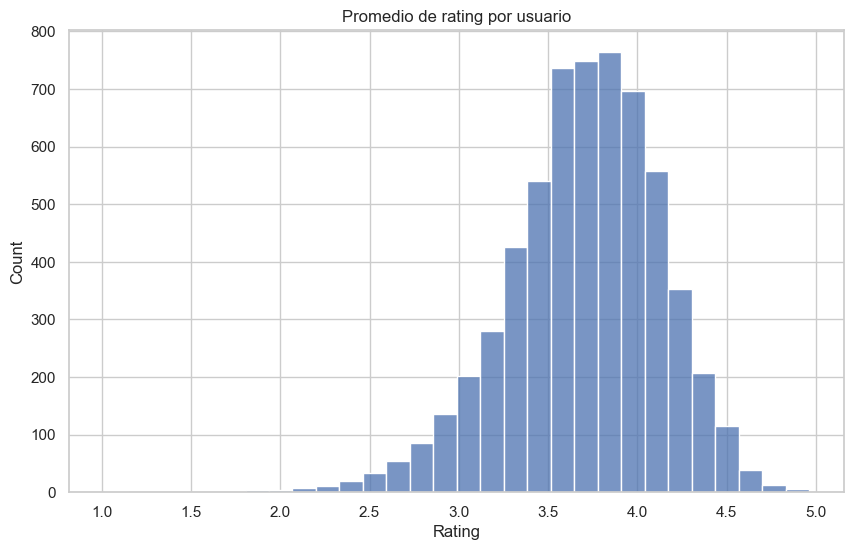

In [9]:
# Rating promedio por usuario
ratings_by_user = ratings.groupby("UserID")["Rating"].mean()
sns.histplot(ratings_by_user, bins=30)
plt.title("Promedio de rating por usuario")
plt.show()


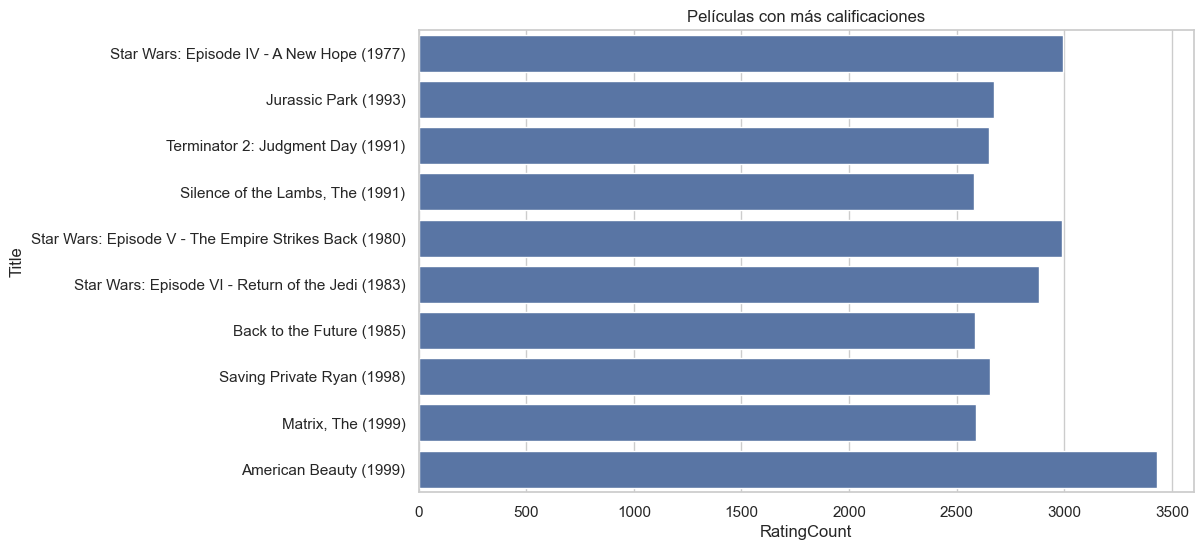

In [10]:
    # Películas más populares
movie_counts = ratings["MovieID"].value_counts().head(10)
popular_movies = movies[movies["MovieID"].isin(movie_counts.index)]

popular_movies = popular_movies.merge(movie_counts.rename("RatingCount"), left_on="MovieID", right_index=True)
sns.barplot(x="RatingCount", y="Title", data=popular_movies)
plt.title("Películas con más calificaciones")
plt.show()


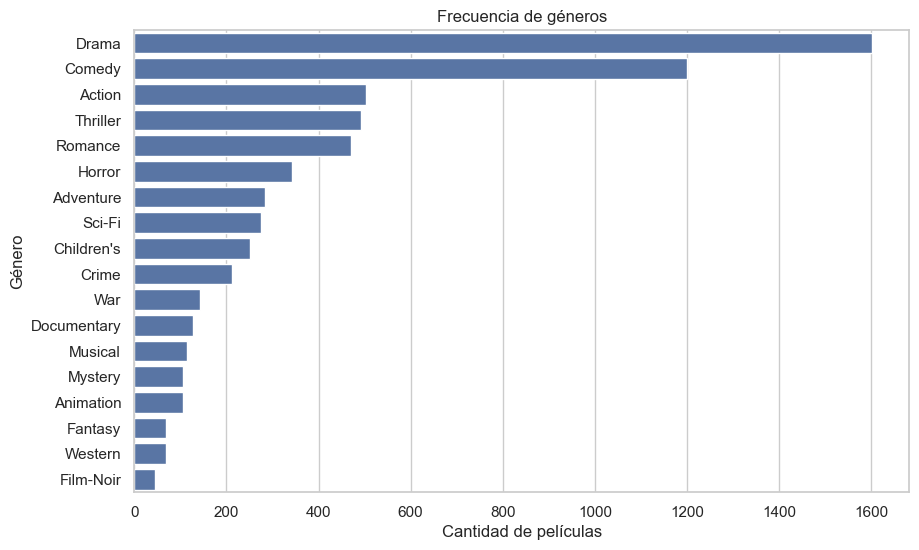

In [11]:
from collections import Counter

# Cada película puede tener múltiples géneros separados por |
all_genres = movies["Genres"].str.split("|").explode()
genre_counts = all_genres.value_counts()

sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Frecuencia de géneros")
plt.xlabel("Cantidad de películas")
plt.ylabel("Género")
plt.show()


In [12]:
full_df = ratings.merge(users, on="UserID").merge(movies, on="MovieID")
full_df.head()


,UserID,MovieID,Rating,Timestamp,Datetime,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,2000-12-31 22:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,2000-12-31 22:35:09,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,2000-12-31 22:32:48,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,2000-12-31 22:04:35,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,2001-01-06 23:38:11,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


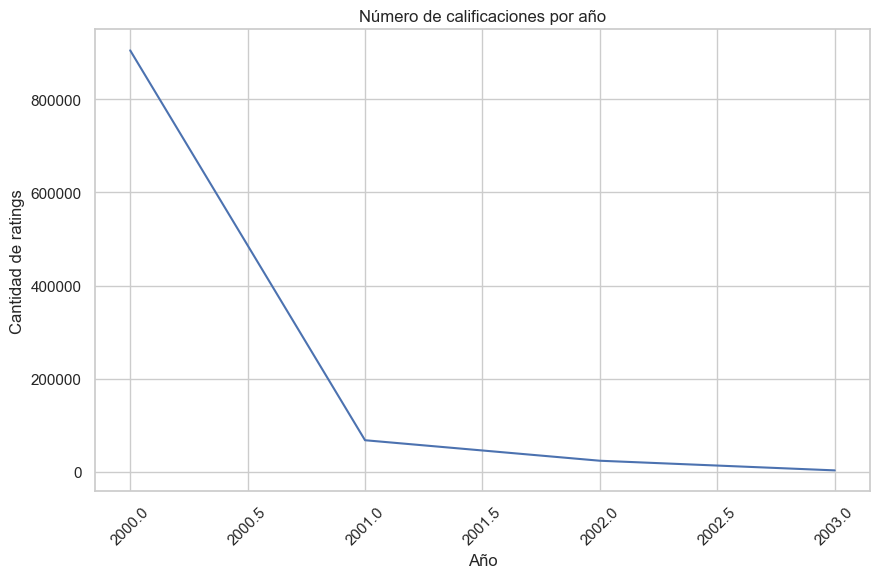

In [13]:
ratings["Year"] = ratings["Datetime"].dt.year
ratings_per_year = ratings["Year"].value_counts().sort_index()

sns.lineplot(x=ratings_per_year.index, y=ratings_per_year.values)
plt.title("Número de calificaciones por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de ratings")
plt.xticks(rotation=45)
plt.show()


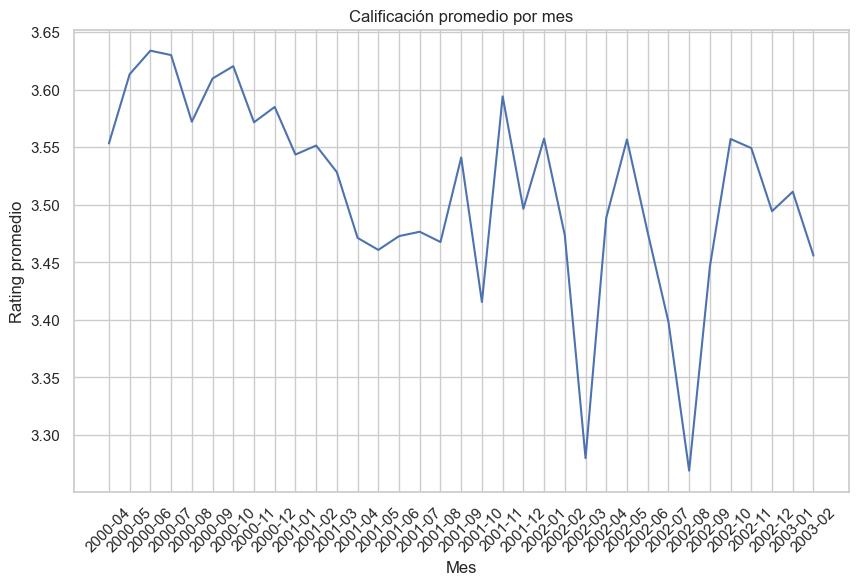

In [14]:
ratings["YearMonth"] = ratings["Datetime"].dt.to_period("M").astype(str)
avg_rating_per_month = ratings.groupby("YearMonth")["Rating"].mean()

sns.lineplot(x=avg_rating_per_month.index, y=avg_rating_per_month.values)
plt.title("Calificación promedio por mes")
plt.xlabel("Mes")
plt.ylabel("Rating promedio")
plt.xticks(rotation=45)
plt.show()


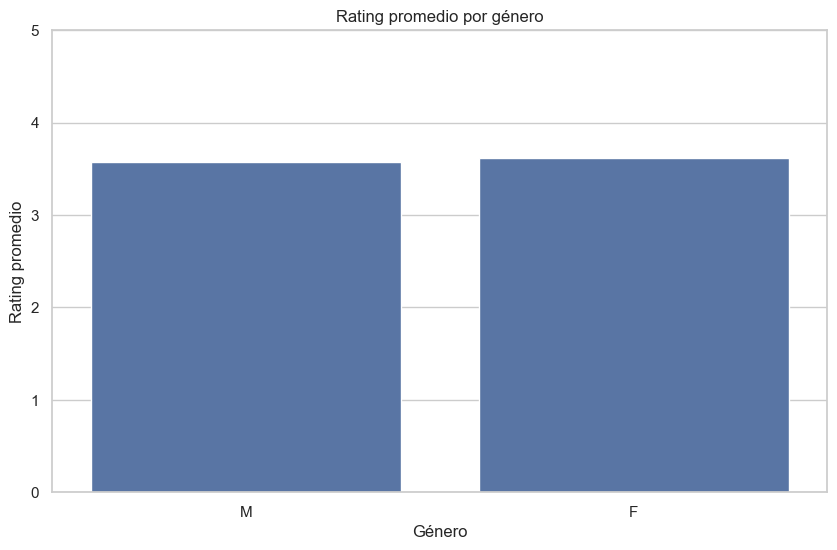

In [15]:
avg_by_gender = full_df.groupby("Gender")["Rating"].mean().sort_values()

sns.barplot(x=avg_by_gender.index, y=avg_by_gender.values)
plt.title("Rating promedio por género")
plt.ylabel("Rating promedio")
plt.xlabel("Género")
plt.ylim(0, 5)
plt.show()
#No hay diferencia por genero, parece que no discrimina#

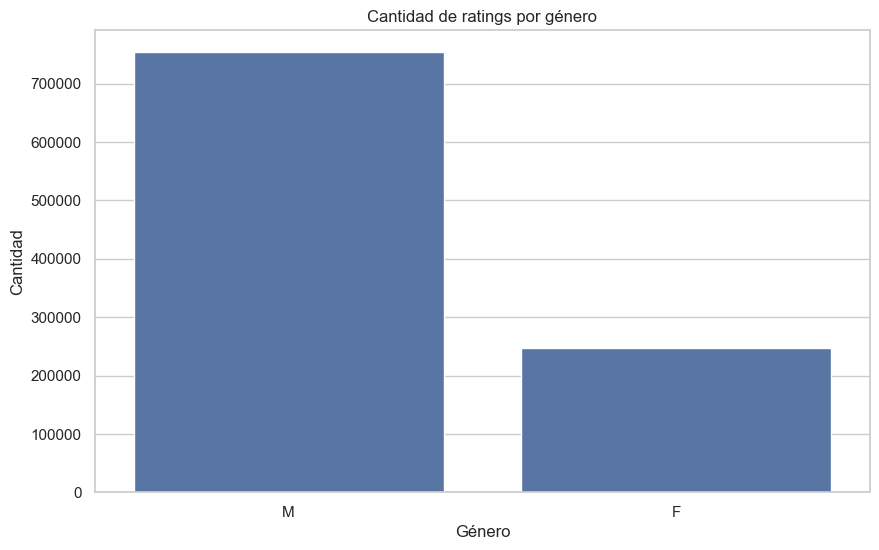

In [16]:
count_by_gender = full_df["Gender"].value_counts()

sns.barplot(x=count_by_gender.index, y=count_by_gender.values)
plt.title("Cantidad de ratings por género")
plt.ylabel("Cantidad")
plt.xlabel("Género")
plt.show()


In [17]:
full_df["Age"].value_counts().sort_index()


Age
1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
Name: count, dtype: int64

In [18]:
full_df["Age"].value_counts().sort_index()
age_map = {
    1: "<18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}
full_df["AgeGroup"] = full_df["Age"].map(age_map)



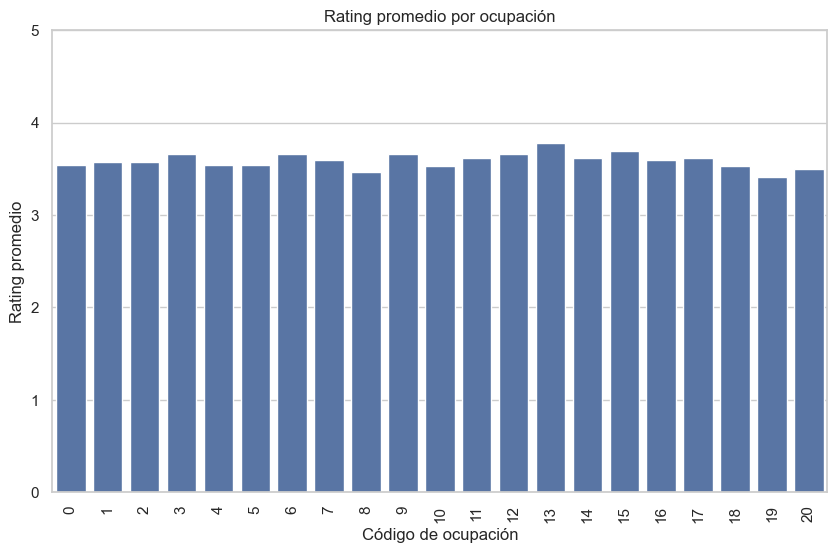

In [20]:
full_df["Occupation"].value_counts().head(10)


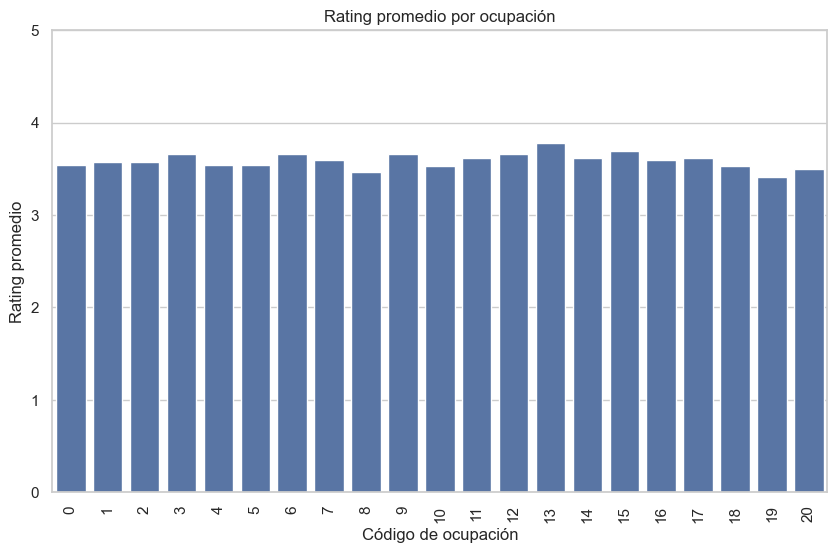

In [21]:
avg_by_occ = full_df.groupby("Occupation")["Rating"].mean().sort_values()

sns.barplot(x=avg_by_occ.index, y=avg_by_occ.values)
plt.title("Rating promedio por ocupación")
plt.xlabel("Código de ocupación")
plt.ylabel("Rating promedio")
plt.xticks(rotation=90)
plt.ylim(0, 5)
plt.show()
#no parece que la ocupacion discrimine en rating#

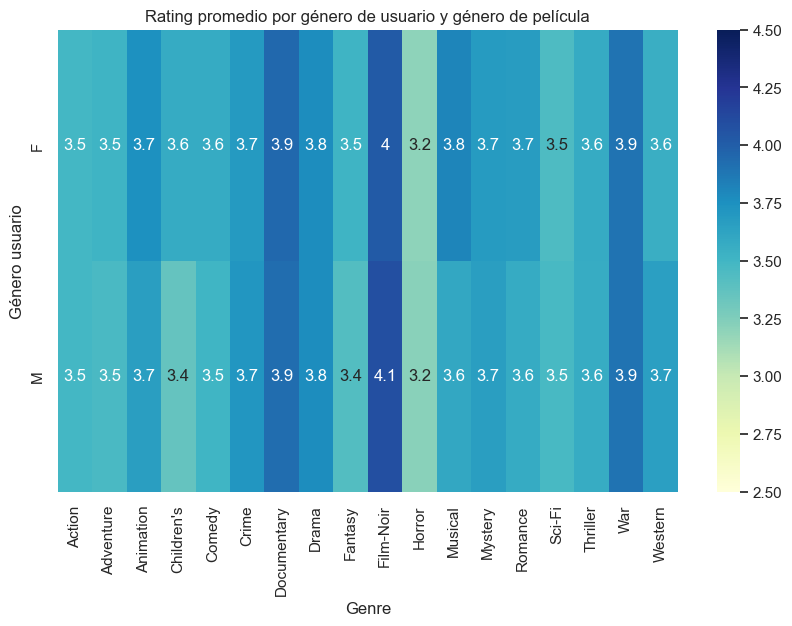

In [22]:
# separar todos los generos
gen_rate = full_df.copy()
gen_rate = gen_rate.assign(Genre=gen_rate["Genres"].str.split("|"))
gen_rate = gen_rate.explode("Genre")

avg_gen_rate = gen_rate.groupby(["Gender", "Genre"])["Rating"].mean().unstack()

sns.heatmap(avg_gen_rate, annot=True, cmap="YlGnBu", vmin=2.5, vmax=4.5)
plt.title("Rating promedio por género de usuario y género de película")
plt.ylabel("Género usuario")
plt.show()
#pequenas diferencias por genero de pelicula y de usuario en algunas peliculas#

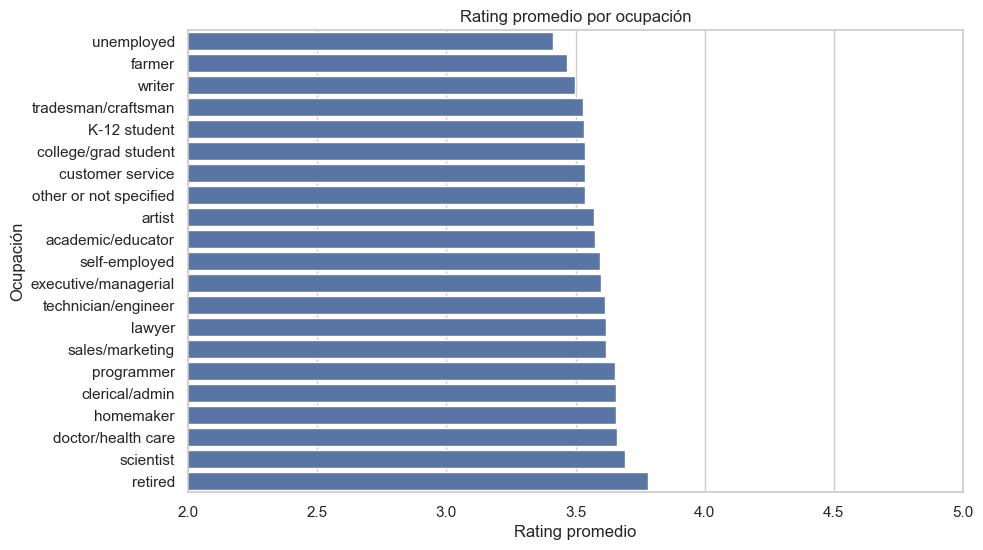

In [23]:

#De la documentación oficial del dataset MovieLens 1M

relacion_ocupacion = {
    0:  "other or not specified",
    1:  "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

full_df["descripcion_ocupacion"] = full_df["Occupation"].map(relacion_ocupacion)

avg_rating_occ = full_df.groupby("descripcion_ocupacion")["Rating"].mean().sort_values()

sns.barplot(x=avg_rating_occ.values, y=avg_rating_occ.index)
plt.title("Rating promedio por ocupación")
plt.xlabel("Rating promedio")
plt.ylabel("Ocupación")
plt.xlim(2, 5)
plt.show()
